In [1]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from natsort import natsorted, ns

In [2]:
"""
A script to evaulate an experiment and create plots accoringly. 

"""

'\nA script to evaulate an experiment and create plots accoringly. \n\n'

In [103]:
#set experiment folder as root dir of this script
experiment_folder = "./data/greater-exp"
os.chdir(experiment_folder)

FileNotFoundError: [Errno 2] No such file or directory: './data/greater-exp'

In [146]:
#set hyperparameters 
num_generations = 6
population_size = 100
num_runs = 2


    

In [147]:
df = pd.DataFrame()
generation_identifiers = {}

for run in sorted(os.listdir(".")):
    if run[0].isdigit():
        #only use the run dirs 
        for filename in natsorted(os.listdir("./"+run+"/generations")):
            _generation_ids = pd.read_csv("./"+run+"/generations/"+filename+"/identifiers.txt", header=None)
            _generation_ids.rename({0: filename}, axis=1, inplace=True)
            if not f"{run}" in generation_identifiers:
                generation_identifiers[f"{run}"] = []
            generation_identifiers[f"{run}"].append(_generation_ids)

In [148]:
#contains the information about the phenotype ID of each generation
generation_identifiers['1'][0].head(3)

,generation_0
0,1
1,2
2,3


In [149]:
runs = {}
for run in range(1, num_runs+1):
    # cause run starts with 1 
    df = pd.DataFrame()
    for generation in range(num_generations):
        df = df.append(generation_identifiers[f"{run}"][generation][f"generation_{generation}"])
    runs[f"{run}"] = df

In [150]:
fitness_values = {}

for run in range(1, num_runs+1):
    fitness_values[f"{run}"] = pd.read_csv(f"{run}/data_fullevolution/fitness.csv", header=None)
    fitness_values[f"{run}"].rename({0:"Individual_ID", 1:"Distance to Target"}, axis=1, inplace=True)

In [151]:
# no exchange the phenotype ID with the fitness value 
fitness_df = pd.DataFrame()
for _run in runs:
    run_df = runs[_run]
    _fitness_df = cp.deepcopy(run_df.T)
    for gen in run_df.T:
        for index in range(len(run_df.T)):
            individual = int((_fitness_df[gen][int(index)]))
            fitness_value = fitness_values[str(_run)].T[(individual)]['Distance to Target']
            _fitness_df[gen][index] = fitness_value
            
    cur_run = np.ndarray(shape=(len(_fitness_df)))
    cur_run.fill(int(_run))
    _fitness_df['run'] = cur_run

    fitness_df = fitness_df.append(_fitness_df)

In [152]:
fitness_df

,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,run
0,-0.003457,-0.022600,-0.020000,-0.052191,-0.020000,-0.020000,1.0
1,-0.023369,-0.020074,-0.020170,-0.037763,-0.020000,-0.023633,1.0
2,-0.020000,-0.005229,-0.023708,-0.063376,-0.042358,-0.020114,1.0
3,-0.031922,-0.052191,-0.023262,-0.020008,-0.020000,-0.020000,1.0
4,-0.056974,-0.020054,-0.020000,-0.020004,-0.020038,-0.020000,1.0
...,...,...,...,...,...,...,...
95,-0.020366,-0.020000,-0.020096,-0.020000,-0.016524,-0.020001,2.0
96,-0.020600,-0.025359,-0.020000,-0.020000,-0.020000,-0.023118,2.0
97,-0.022676,-0.020000,-0.027438,-0.020631,-0.018027,0.003631,2.0
98,0.047116,-0.021502,-0.022321,-0.020000,-0.021405,-0.020000,2.0


In [153]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}

for run in range(num_runs):
    for gen in fitness_df:
        if gen != 'run':
            mean_dic[gen] = fitness_df[gen].mean()
            std_dic[gen] = fitness_df[gen].std()
            min_dic[gen] = fitness_df[gen].min()
            max_dic[gen] = fitness_df[gen].max()

        
    
    mean_df = pd.DataFrame(mean_dic, index=[0]).rename({0:"mean"})
    std_df =  pd.DataFrame(std_dic, index=[0]).rename({0:"std"})
    min_df =  pd.DataFrame(min_dic, index=[0]).rename({0:"min"})
    max_df =  pd.DataFrame(max_dic, index=[0]).rename({0:"max"})
    result_df = mean_df.append(std_df).append(min_df).append(max_df).T
    result_df['run'] = run

In [154]:
result_df

,mean,std,min,max,run
generation_0,-0.028218,0.028310,-0.222719,0.047116,1
generation_1,-0.027267,0.026318,-0.222719,0.047116,1
generation_2,-0.024808,0.017397,-0.160508,0.050164,1
generation_3,-0.024735,0.017325,-0.160508,0.050164,1
generation_4,-0.024083,0.020090,-0.160508,0.116842,1
generation_5,-0.023875,0.016829,-0.098874,0.116842,1


In [155]:
result_df = result_df.set_axis([i for i in range(len(result_df))])

In [156]:
result_df.index.name = 'generations'

In [157]:
result_df

,mean,std,min,max,run
generations,,,,,
0,-0.028218,0.028310,-0.222719,0.047116,1
1,-0.027267,0.026318,-0.222719,0.047116,1
2,-0.024808,0.017397,-0.160508,0.050164,1
3,-0.024735,0.017325,-0.160508,0.050164,1
4,-0.024083,0.020090,-0.160508,0.116842,1
5,-0.023875,0.016829,-0.098874,0.116842,1


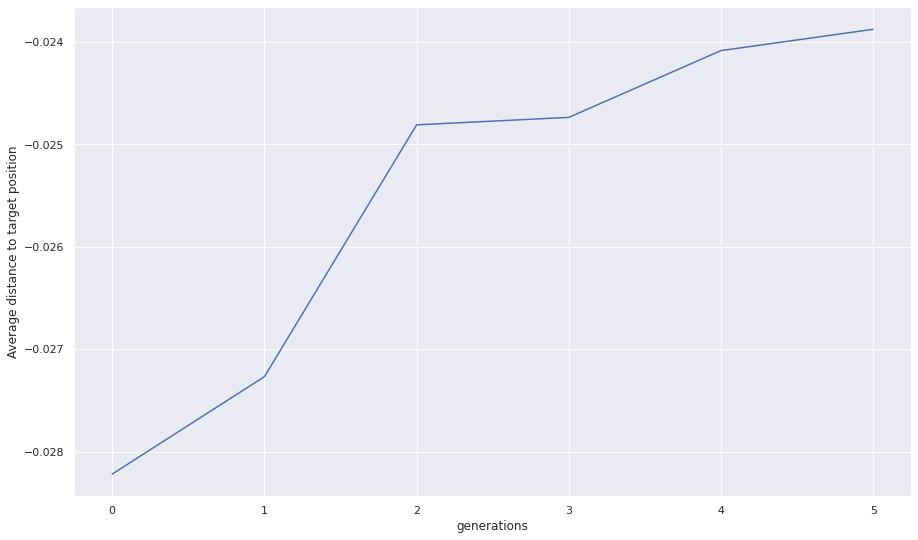

In [162]:
ax = sns.lineplot(x=result_df.T.columns, y=result_df['mean'], markers=True, dashes=True)
ax.set(ylabel='Average distance to target position')
sns.set(rc={'figure.figsize':(15,9)})
ax.figure.savefig("output.png")
plt.show()

<AxesSubplot:xlabel='generations'>

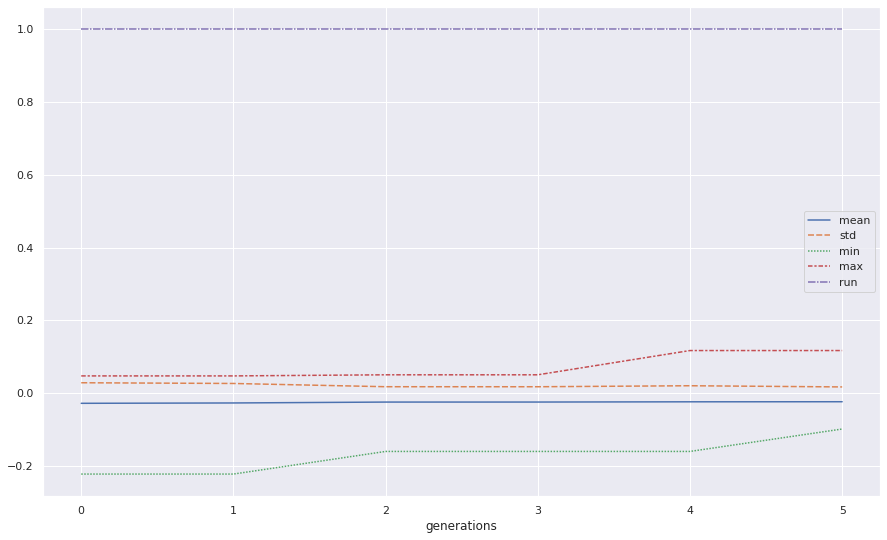

In [159]:
sns.lineplot(data=result_df)

In [228]:
formated_fitness_df = cp.deepcopy(fitness_df)
formated_fitness_df.set_axis([i for i in range(len(fitness_df.T))], axis=1, inplace=True)
formated_fitness_df.rename(columns={len(fitness_df.T)-1 : 'run'}, inplace=True)
formated_fitness_df

,0,1,2,3,4,5,run
0,-0.003457,-0.022600,-0.020000,-0.052191,-0.020000,-0.020000,1.0
1,-0.023369,-0.020074,-0.020170,-0.037763,-0.020000,-0.023633,1.0
2,-0.020000,-0.005229,-0.023708,-0.063376,-0.042358,-0.020114,1.0
3,-0.031922,-0.052191,-0.023262,-0.020008,-0.020000,-0.020000,1.0
4,-0.056974,-0.020054,-0.020000,-0.020004,-0.020038,-0.020000,1.0
...,...,...,...,...,...,...,...
95,-0.020366,-0.020000,-0.020096,-0.020000,-0.016524,-0.020001,2.0
96,-0.020600,-0.025359,-0.020000,-0.020000,-0.020000,-0.023118,2.0
97,-0.022676,-0.020000,-0.027438,-0.020631,-0.018027,0.003631,2.0
98,0.047116,-0.021502,-0.022321,-0.020000,-0.021405,-0.020000,2.0


In [229]:
melted_formated_fitness = formated_fitness_df.melt(id_vars='run')
melted_formated_fitness.rename(columns={'variable':'generation', 'value':'fitness'}, inplace=True)
melted_formated_fitness.head(3)

,run,generation,fitness
0,1.0,0,-0.003457
1,1.0,0,-0.023369
2,1.0,0,-0.020000


<AxesSubplot:xlabel='generation', ylabel='fitness'>

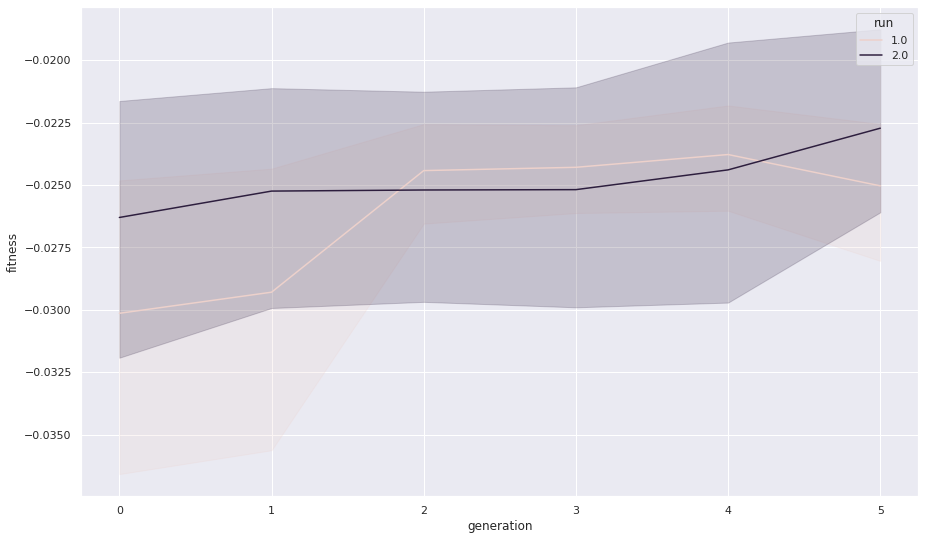

In [230]:
sns.lineplot(data=melted_formated_fitness, x='generation', hue='run', y='fitness')

In [192]:
# TODO: create boxplots over individual performance

In [88]:
fitness_mean = []
fitness_std = []
for i, val in enumerate(generation_identifiers):
    merged_gen = pd.merge(
        left=val,
        right=fitness_run_1,
        how="inner",
        on=None,
        left_on="generation_"+str(i),
        right_on="Individual_ID",
        left_index=False,
        right_index=False,
        sort=True,
        suffixes=("_x", "_y"),
        copy=True,
        indicator=False,
        validate=None,
    )
    gen_mean = merged_gen["Distance to Target"].mean()  
    gen_std = merged_gen["Distance to Target"].std()
    fitness_mean.append(gen_mean)
    fitness_std.append(gen_mean)

NameError: name 'fitness_run_1' is not defined

In [856]:
import matplotlib.pyplot as plt

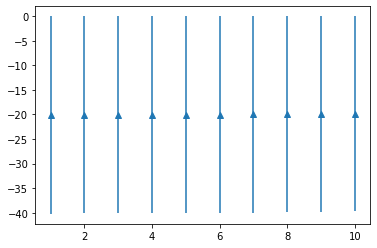

In [129]:
plt.errorbar(list(range(1,len(fitness_mean)+1)), fitness_mean, fitness_std,linestyle='None', marker='^')
plt.show()

In [692]:
max((result_df['max']))

-19.270146693442285

Individual_ID         41.00000
Distance to Target   -19.07879
Name: 40, dtype: float64

,Individual_ID,Distance to Target
40,41.0,-19.078790
40,41.0,-20.099967
40,41.0,-20.092420


In [750]:
run_1_best = fitness_run_1.T[40]
run_2_best = fitness_run_2.T[40]
run_3_best = fitness_run_3.T[40]


In [753]:
run_1_best['run'] = 1
run_2_best['run'] = 2
run_3_best['run'] = 3

In [754]:
best_pheno_df = pd.DataFrame(run_1_best).T.append(run_2_best).append(run_3_best)

In [784]:
best_pheno_df = best_pheno_df.reset_index(drop=True)

In [760]:
best = best_pheno_df['Distance to Target'].mean()
std = best_pheno_df['Distance to Target'].std()

In [785]:
fit = best_pheno_df['Distance to Target']
fit

0   -19.078790
1   -20.099967
2   -20.092420
Name: Distance to Target, dtype: float64

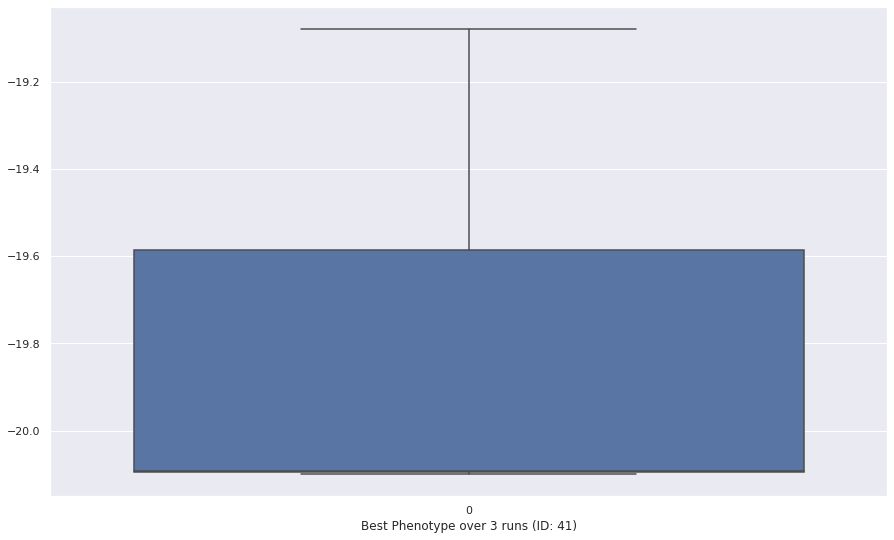

In [807]:
ax = sns.boxplot(data=best_pheno_df['Distance to Target'])
ax.set(xlabel='Best Phenotype over 3 runs (ID: 41)')
ax.figure.savefig('best_phenotype_41.png')